<a href="https://colab.research.google.com/github/welivefree/GetBoarded_Latitude/blob/ipython/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/newb-dev-1008/GetBoarded_Latitude/master/Week%202%20Data/covid_recovery_data.csv'
df = pd.read_csv(url)

In [13]:
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,NaN,-20.0,30.0,23.0,1.0,3.0
23756,2020-04-17,Zimbabwe,NaN,-20.0,30.0,24.0,2.0,3.0
23757,2020-04-18,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0
23758,2020-04-19,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0


In [20]:
df.isna().sum()

Date                  0
Country/Region        0
Province/State    16380
Lat                   0
Long                  0
Confirmed            90
Recovered          1260
Deaths               90
dtype: int64

In [0]:
index=df[ (df['Confirmed']==0)  & (df['Recovered']==0) &  (df['Deaths']==0 )].index

In [0]:
df.drop(index , inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14377 entries, 33 to 23759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            14377 non-null  object 
 1   Country/Region  14377 non-null  object 
 2   Province/State  5736 non-null   object 
 3   Lat             14377 non-null  float64
 4   Long            14377 non-null  float64
 5   Confirmed       14287 non-null  float64
 6   Recovered       13117 non-null  float64
 7   Deaths          14287 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1010.9+ KB


In [35]:
pip install --upgrade geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 13.8MB/s 
     |████████████████████████████████| 14.7MB 331kB/s 


In [0]:
import matplotlib.pyplot as plt
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
geo= [Point(xy) for xy in zip(df['Lat'], df['Long'])]

In [0]:
geo_df=gpd.GeoDataFrame(df, geometry=geo)

In [40]:
geo_df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,geometry
33,2020-02-24,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
34,2020-02-25,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
35,2020-02-26,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
36,2020-02-27,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
37,2020-02-28,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
...,...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,NaN,-20.0,30.0,23.0,1.0,3.0,POINT (-20.00000 30.00000)
23756,2020-04-17,Zimbabwe,NaN,-20.0,30.0,24.0,2.0,3.0,POINT (-20.00000 30.00000)
23757,2020-04-18,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)
23758,2020-04-19,Zimbabwe,NaN,-20.0,30.0,25.0,2.0,3.0,POINT (-20.00000 30.00000)


In [42]:
geo_df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,geometry
33,2020-02-24,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
34,2020-02-25,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
35,2020-02-26,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
36,2020-02-27,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)
37,2020-02-28,Afghanistan,NaN,33.0,65.0,1.0,0.0,0.0,POINT (33.00000 65.00000)


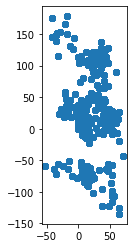

In [57]:
geo_df.plot()

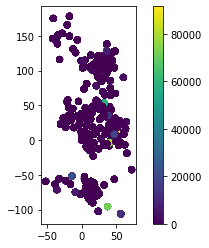

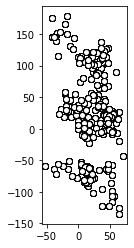

In [56]:
fig, ax = plt.subplots(1, 1)
base = geo_df.plot(color='white', edgecolor='black')
geo_df.plot(column='Recovered',ax=ax ,legend=True)

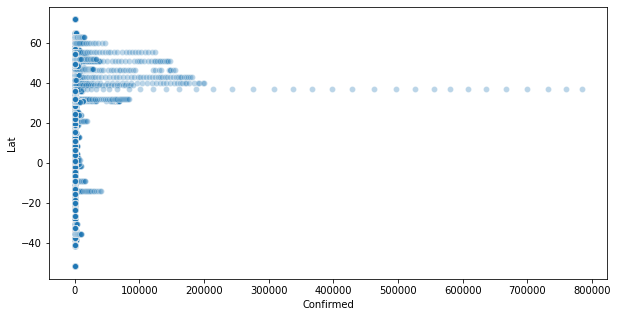

In [73]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,5))
sns.scatterplot(df['Confirmed'], df['Lat'],   alpha=0.3)

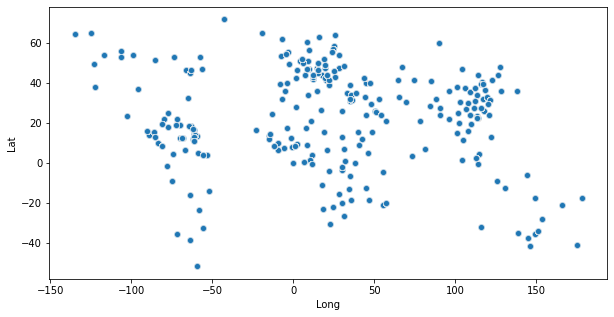

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Long'], df['Lat'],   alpha=0.3)

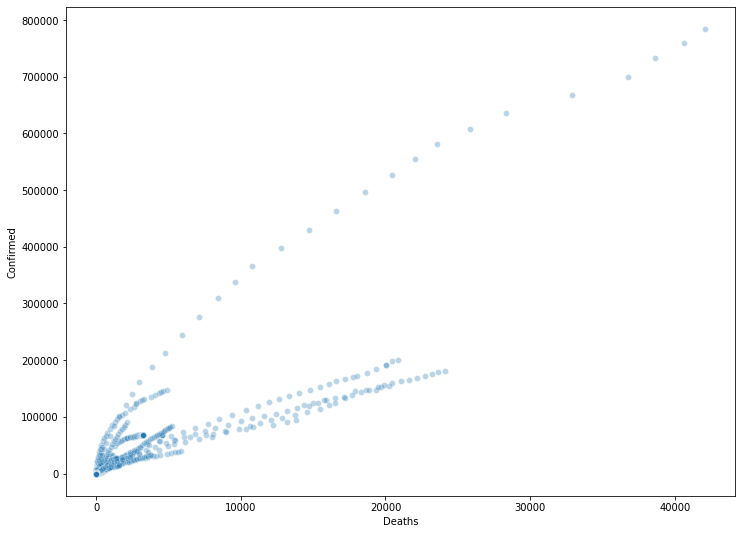

In [90]:
fig, ax = plt.subplots(1, figsize=(12, 9))
sns.scatterplot(df['Deaths'], df['Confirmed'],   alpha=0.3)

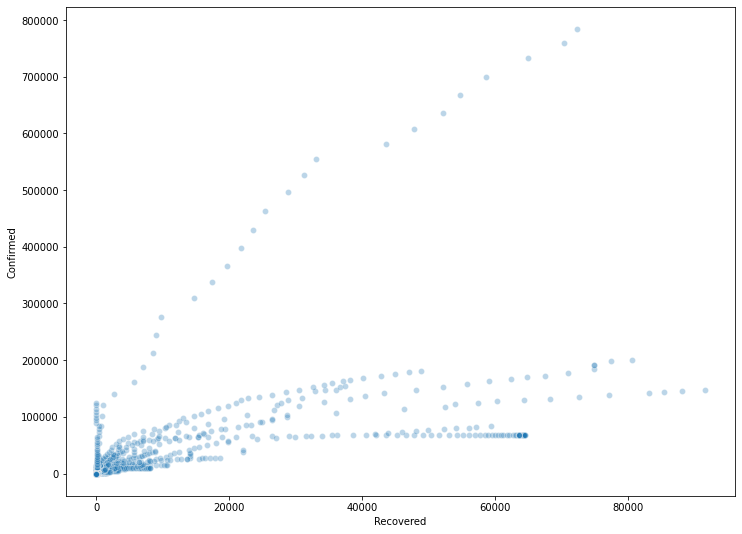

In [91]:
fig, ax = plt.subplots(1, figsize=(12, 9))
sns.scatterplot(df['Recovered'], df['Confirmed'],   alpha=0.3)